In [1]:
import pandas as pd
import numpy as np

In [2]:
games = pd.read_csv("../dataset/online-data/games.csv")
units = pd.read_csv("../dataset/online-data/units.csv")
orders = pd.read_csv("../dataset/online-data/orders.csv")
turns = pd.read_csv("../dataset/online-data/turns.csv")
players = pd.read_csv("../dataset/online-data/players.csv")

## データセットの確認
|data|features|
|---- | ----|
| games | ゲームのid, ターン数, プレイヤー数|
| players | ゲームのid, プレイヤーid, 勝利, 補給地の数, 敗退, 開始ターン, 終了ターン|
| units | ゲームid, 国id, タイプ, 開始ターン, 終了ターン, ユニットid|
| turns | ゲームid, ターンid, フェーズ, 年, 各国の補給地の数|
| orders | ゲームのid, ユニットのid, オーダーの種類, 現在地, 目的地, 目標(convoy, support), 成功, 理由, ターンid|

In [3]:
games.head()

,id,num_turns,num_players
0,37317,166,7
1,37604,51,7
2,39337,101,7
3,40541,46,7
4,44755,96,7


In [4]:
players.head()

,game_id,country,won,num_supply_centers,eliminated,start_turn,end_turn
0,114417,E,0,0,0,1,7
1,114417,F,0,9,0,1,21
2,114417,I,0,0,0,1,7
3,114417,G,0,4,0,1,17
4,114417,A,1,11,0,1,21


In [5]:
units.head()

,game_id,country,type,start_turn,end_turn,unit_id
0,114417,E,F,0,7,0
1,114417,E,A,0,10,1
2,114417,E,F,0,13,2
3,114417,F,A,0,21,3
4,114417,F,A,0,21,4


In [6]:
turns.head()

,game_id,turn_num,phase,year,season,scs_england,scs_france,scs_italy,scs_russia,scs_turkey,scs_germany,scs_austria
0,114417,0,Winter,1900,Winter,3,3,3,4,3,3,3
1,114417,1,Orders,1901,Spring,3,3,3,4,3,3,3
2,114417,2,Orders,1901,Fall,3,3,3,4,3,3,3
3,114417,3,Build,1901,Fall,4,6,4,6,4,4,5
4,114417,4,Orders,1902,Spring,4,6,4,6,4,4,5


In [7]:
orders.head()

,game_id,unit_id,unit_order,location,target,target_dest,success,reason,turn_num
0,114417,0,MOVE,Edinburgh,Norwegian Sea,NaN,1,NaN,1
1,114417,1,MOVE,Liverpool,Yorkshire,NaN,1,NaN,1
2,114417,2,MOVE,London,North Sea,NaN,1,NaN,1
3,114417,3,MOVE,Marseilles,Spain,NaN,1,NaN,1
4,114417,4,MOVE,Paris,Picardy,NaN,1,NaN,1


In [8]:
import seaborn as sns

## データ分析
### ゲーム概観

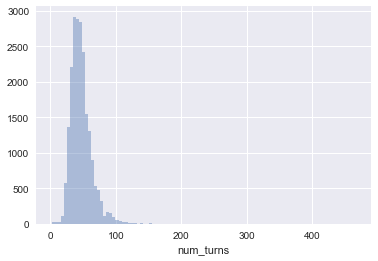

In [9]:
# 1ゲームあたりのターン数
sns.set()
x = games['num_turns']
sns.distplot(x, kde=False, rug=False, bins=100)

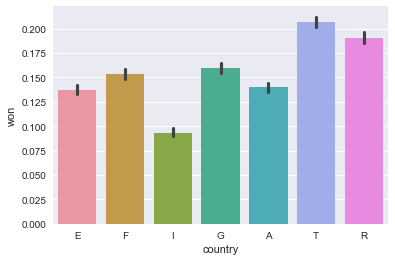

In [10]:
# 国ごとの勝率比較
sns.barplot(x="country", y="won", data = players)

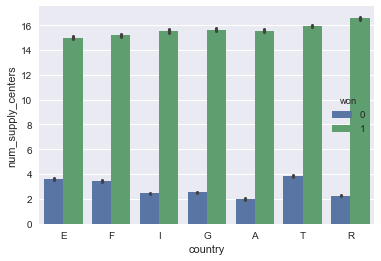

In [11]:
# 国ごとの補給地の数（平均, 勝ち負け別）
sns.barplot(x="country", y="num_supply_centers", hue="won", data = players)

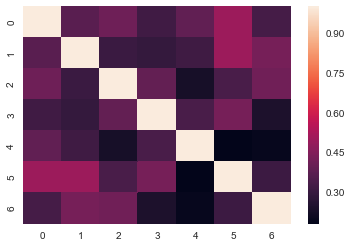

In [12]:
# 国と補給地の数の相関を調べる
correlation_matrix = np.corrcoef([players[(players["country"] == "E")]["end_turn"],
           players[(players["country"] == "F")]["end_turn"],
           players[(players["country"] == "I")]["end_turn"],
           players[(players["country"] == "G")]["end_turn"],
           players[(players["country"] == "A")]["end_turn"],
           players[(players["country"] == "T")]["end_turn"],
           players[(players["country"] == "R")]["end_turn"]])
sns.heatmap(correlation_matrix)

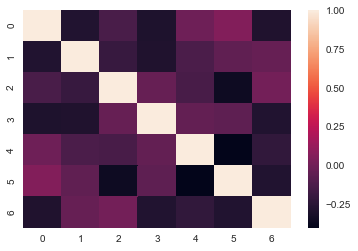

In [13]:
# 国と補給地の数の相関を調べる
correlation_matrix = np.corrcoef([players[(players["country"] == "E")]["num_supply_centers"],
           players[(players["country"] == "F")]["num_supply_centers"],
           players[(players["country"] == "I")]["num_supply_centers"],
           players[(players["country"] == "G")]["num_supply_centers"],
           players[(players["country"] == "A")]["num_supply_centers"],
           players[(players["country"] == "T")]["num_supply_centers"],
           players[(players["country"] == "R")]["num_supply_centers"]])
sns.heatmap(correlation_matrix)

### unitの動きについて分析
<img src="../img/maxresdefault.jpg" width="300">

In [14]:
# 初手(Edinburgh -> )の遷移先
# sns.barplot(x="target", y="success", data = orders[orders["turn_num"]==1][orders["success"]==1][orders["location"]=="Edinburgh"], estimator=sum)
# players.head()

In [15]:
# merge
dataset = pd.merge(orders, units, on=['game_id', 'unit_id'])
dataset = pd.merge(dataset, players, on=['game_id', 'country'])
dataset.head()

,game_id,unit_id,unit_order,location,target,target_dest,success,reason,turn_num,country,type,start_turn_x,end_turn_x,won,num_supply_centers,eliminated,start_turn_y,end_turn_y
0,114417,0,MOVE,Edinburgh,Norwegian Sea,NaN,1,NaN,1,E,F,0,7,0,0,0,1,7
1,114417,0,MOVE,Norwegian Sea,Norway,NaN,1,NaN,2,E,F,0,7,0,0,0,1,7
2,114417,0,SUPPORT,Norway,London,North Sea,0,Support cut by F Sweden - Norway,4,E,F,0,7,0,0,0,1,7
3,114417,0,HOLD,Norway,NaN,NaN,0,Dislodged by A St. Petersburg - Norway,6,E,F,0,7,0,0,0,1,7
4,114417,0,DESTROY,Norway,NaN,NaN,1,NaN,7,E,F,0,7,0,0,0,1,7


#### turn、unit毎でユニットの頻度を求める

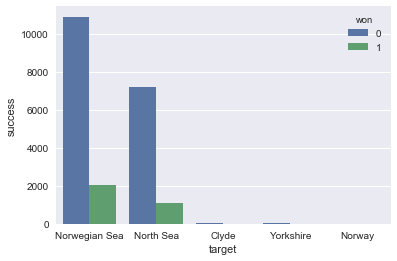

In [20]:
# Edinburghから移動先の頻度
data = dataset[(dataset["turn_num"]==1) & (dataset["success"]==1) & (dataset["location"]=="Edinburgh") & (dataset["unit_order"]=="MOVE")]
sns.barplot(x="target", y="success", data = data, hue="won", estimator=sum)

In [ ]:
# 1901年, turn 1の位置頻度，国毎, win毎
